# Importing Libraries and Data
We will import the necessary libaries and the data with which we will predict whether a person has heart diesease or not

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Droping the null and duplicate values and checking the basic information about the data

In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(302, 14)

# Feature Selection

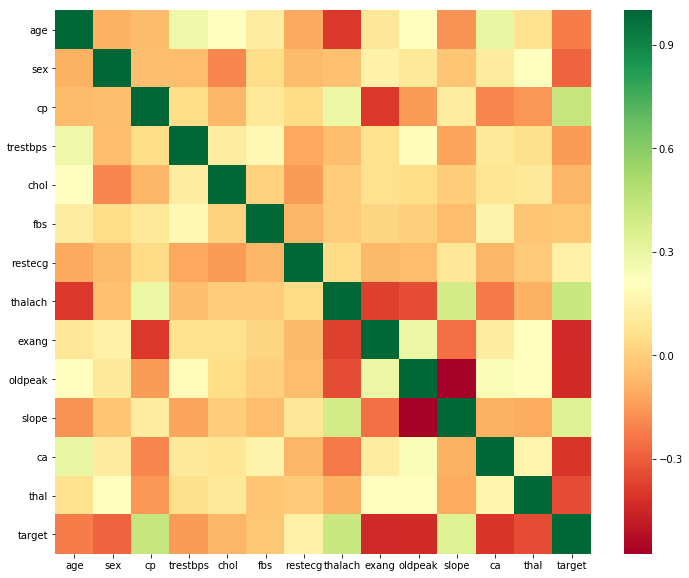

In [18]:
corelation=df.corr()
corindex=corelation.index
plt.figure(figsize=(12,10))
sns.heatmap(df[corindex].corr(),cmap='RdYlGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1340B8>,
      dtype=object)

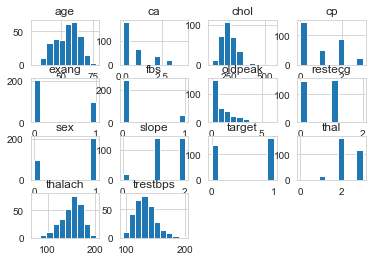

In [27]:
df.hist()

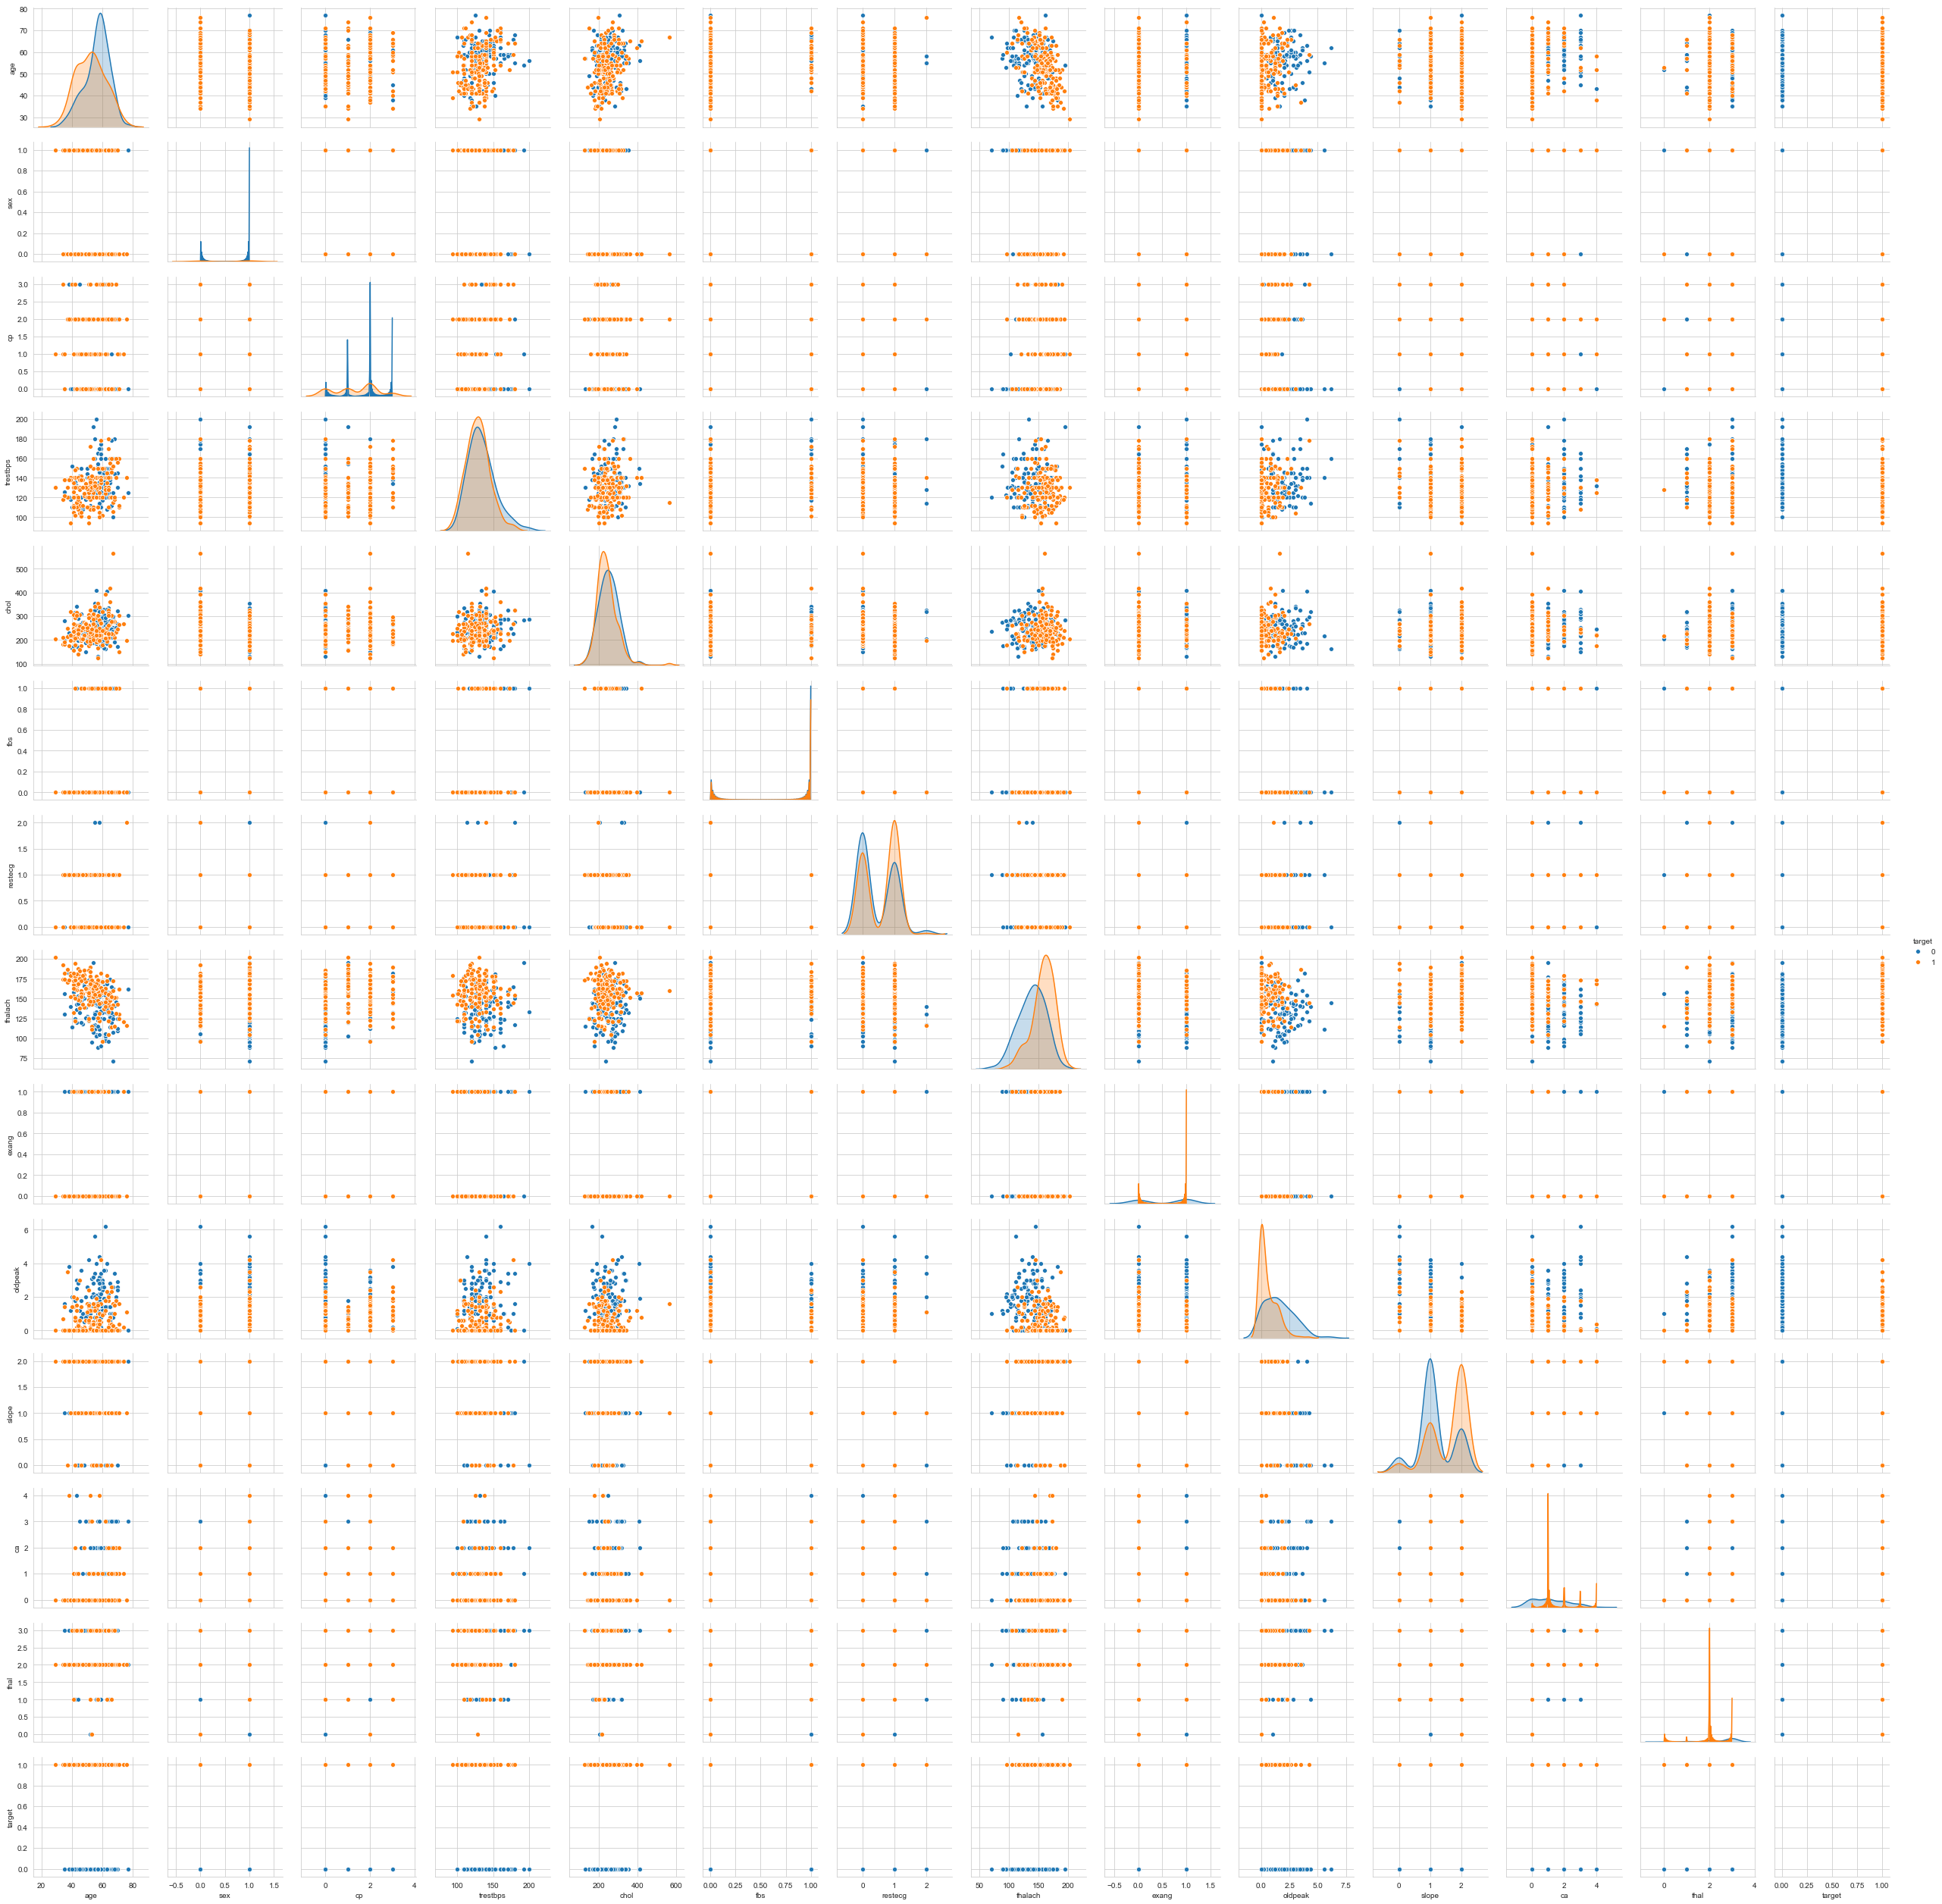

In [36]:
sns.pairplot(df,hue='target')

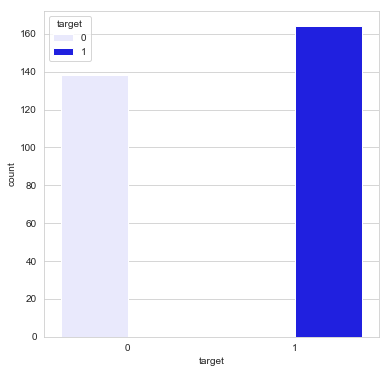

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
sns.countplot(x=df['target'],data=df,hue=df['target'],color='b')

# Data PreProcessing


We will create Dummy Columns for some Features

In [37]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

We will standarize values of some features

In [39]:
scaler=StandardScaler()
columns_to_scale=['age','chol','thalach','oldpeak','trestbps']
dataset[columns_to_scale]=scaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [78]:
x=dataset.drop(['target'],axis=1)
y=dataset['target']
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [79]:
pred=knn.predict(x)

In [80]:
cm=confusion_matrix(y,pred)
cm

array([[115,  23],
       [ 22, 142]], dtype=int64)

In [81]:
ac=accuracy_score(y,pred)
ac

0.8509933774834437

In [82]:
cr=classification_report(y,pred)
print("Classification Report:\n",cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       138
           1       0.86      0.87      0.86       164

   micro avg       0.85      0.85      0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



In [83]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(scores.mean())

Text(0.5, 1.0, 'The Scores for differnt values of K in KNN Classifier ')

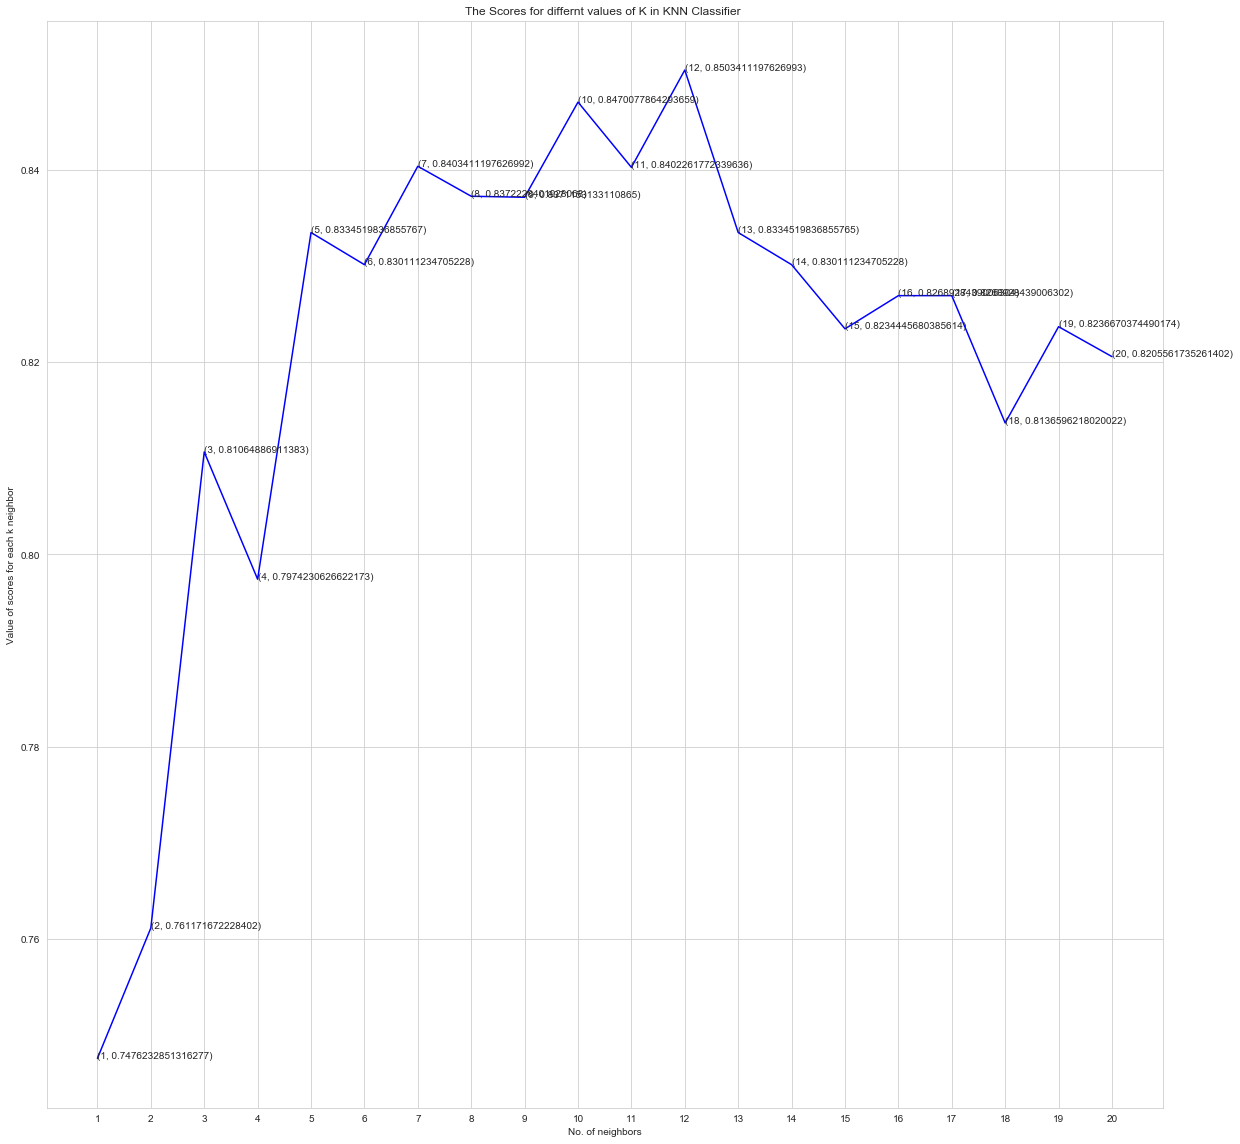

In [84]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.ylabel("Value of scores for each k neighbor")
plt.xlabel("No. of neighbors")
plt.title("The Scores for differnt values of K in KNN Classifier ")

In [89]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
scores=cross_val_score(knn_classifier,x,y,cv=10)
scores.mean()

0.8503411197626993

# Random Forest Classifier

In [121]:
rf_classifier=RandomForestClassifier(n_estimators=10)
randomforest=rf_classifier.fit(x,y)
pred_rdf=randomforest.predict(x)


In [122]:
cm_rdf=confusion_matrix(y,pred_rdf)
cm_rdf

array([[138,   0],
       [  1, 163]], dtype=int64)

In [123]:
ac_rdf=accuracy_score(y,pred_rdf)
ac_rdf

0.9966887417218543

In [124]:
cr_rdf=classification_report(y,pred_rdf)
print("Classification Report:\n",cr_rdf)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      1.00       164

   micro avg       1.00      1.00      1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



In [125]:
scores_rdf=cross_val_score(rf_classifier,x,y,cv=10)
scores_rdf.mean()

0.8243270300333705

# Decison Tree

In [160]:
from sklearn import tree
dt_classifier=tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,random_state=0)
decison_tree=dt_classifier.fit(x,y)

In [161]:
pred_dt=decison_tree.predict(x)

In [162]:
ac_dt=accuracy_score(y,pred_dt)
ac_dt

0.8708609271523179

In [163]:
cm_dt=confusion_matrix(y,pred_rdf)
cm_dt

array([[138,   0],
       [  1, 163]], dtype=int64)